In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

In [2]:
# MLP : multi layer perceptron
class MLP1(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=2):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [3]:
input_size, hidden_size, output_size = 64*64*3, 64*64*3, 2

In [4]:
# Model initialization
model = MLP1(input_size, hidden_size, output_size)

# The loss function
criterion = nn.CrossEntropyLoss()

Binary cross entropy loss
$$
-{(y\log(p) + (1 - y)\log(1 - p))}
$$
where


*   p is the predicted probability that the instance belongs to class 0
*   y is the ground truth class {0, 1}




In [5]:
# Our optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001) # lr = learning rate

In [6]:
# Define custom dataset class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.dataset = ImageFolder("./dataset", transform=transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        return image, label

# Define transformation to be applied to images
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor()          # Convert images to PyTorch tensors
])

# Create custom dataset instances for training and validation
train_dataset = CustomDataset(root_dir='dataset', transform=transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
valid_size = len(train_dataset) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(train_dataset, [train_size, valid_size])

# Create DataLoader instances for training and validation
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=32, shuffle=False)


In [7]:
# ! rmdir dataset/.ipynb_checkpoints

In [8]:
# ! rm -rf dataset/chihuahua/img*

In [9]:
 # [RGB dim, dim1 dim2]

Epoch [1/10], Train Loss: 9.1565, Validation Loss: 1.3567
Epoch [2/10], Train Loss: 1.1852, Validation Loss: 1.3999
Epoch [3/10], Train Loss: 0.6662, Validation Loss: 0.5972
Epoch [4/10], Train Loss: 0.5642, Validation Loss: 0.5700
Epoch [5/10], Train Loss: 0.5675, Validation Loss: 0.5724
Epoch [6/10], Train Loss: 0.5365, Validation Loss: 0.6722
Epoch [7/10], Train Loss: 0.5248, Validation Loss: 0.5612
Epoch [8/10], Train Loss: 0.4722, Validation Loss: 0.5860
Epoch [9/10], Train Loss: 0.5993, Validation Loss: 0.5980
Epoch [10/10], Train Loss: 0.4560, Validation Loss: 0.6638


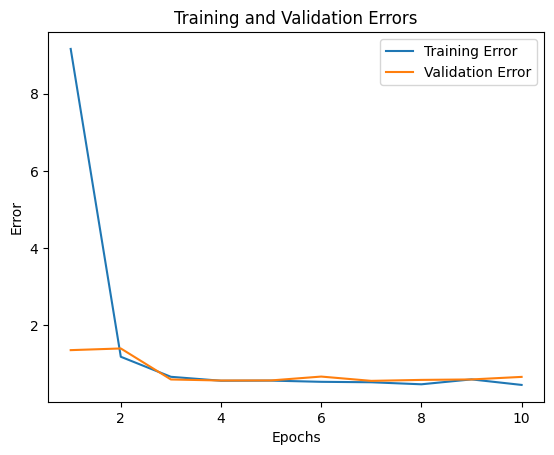

In [10]:
# Lists to store training and validation errors
train_errors = []
val_errors = []

# Training loop
min_loss = 0.45
num_epochs = 10
for epoch in range(num_epochs):
    # Training
    model.train()  # Set the model to training mode
    total_train_loss = 0.0
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images.view(images.size(0), -1))
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = total_train_loss / len(train_loader)
    train_errors.append(avg_train_loss)

    # Validation
    model.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    with torch.no_grad():
        for images, labels in valid_loader:
            outputs = model(images.view(images.size(0), -1))
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    # Calculate average validation loss for the epoch
    avg_val_loss = total_val_loss / len(valid_loader)
    val_errors.append(avg_val_loss)

    if avg_val_loss < min_loss:
        torch.save(model.state_dict(), 'mlp2_model.pth')
        break

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

# Plotting the training and validation errors
plt.plot(range(1, num_epochs+1), train_errors, label='Training Error')
plt.plot(range(1, num_epochs+1), val_errors, label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Validation Errors')
plt.legend()
plt.show()


In [11]:
# Save the trained model
torch.save(model.state_dict(), 'mlp_model.pth')

In [12]:
# Accessing the model's parameters
for name, param in model.named_parameters():
    print(f'Parameter name: {name}')
    print(f'Parameter shape: {param.shape}')
    print(f'Parameter values: {param}')

Parameter name: fc1.weight
Parameter shape: torch.Size([12288, 12288])
Parameter values: Parameter containing:
tensor([[-3.3817e-03,  1.1921e-03,  6.8217e-03,  ...,  6.7844e-03,
         -7.7476e-03, -2.6089e-03],
        [ 1.4114e-03, -4.8188e-03, -4.8327e-03,  ..., -2.3204e-04,
         -4.9024e-03, -6.6122e-03],
        [-7.8554e-03,  6.6781e-03, -1.7374e-03,  ..., -3.9088e-03,
         -1.6715e-03,  7.2260e-03],
        ...,
        [-9.2689e-03, -8.1420e-04, -1.6337e-03,  ..., -4.8790e-03,
         -1.4950e-03, -3.2473e-03],
        [-1.8943e-03, -1.4516e-02, -1.8502e-03,  ..., -1.7457e-03,
         -1.2553e-02,  2.5627e-04],
        [-2.6286e-04, -3.4868e-03,  3.3490e-03,  ...,  5.8895e-06,
          2.0374e-03,  1.9409e-03]], requires_grad=True)
Parameter name: fc1.bias
Parameter shape: torch.Size([12288])
Parameter values: Parameter containing:
tensor([-0.0054, -0.0061, -0.0063,  ..., -0.0145,  0.0004,  0.0094],
       requires_grad=True)
Parameter name: fc2.weight
Parameter sh

In [13]:
# # Define Adam optimizer
# adam_optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Define LBFGS optimizer
# lbfgs_optimizer = optim.LBFGS(model.parameters(), lr=0.01)

# # Lists to store training and validation errors
# train_errors = []
# val_errors = []

# # Training loop
# num_epochs = 10
# for epoch in range(num_epochs):
#     # Training with Adam optimizer
#     model.train()  # Set the model to training mode
#     total_train_loss = 0.0
#     for images, labels in train_loader:
#         # Forward pass
#         outputs = model(images.view(images.size(0), -1))
#         loss = criterion(outputs, labels)

#         # Backward pass and optimization with Adam
#         adam_optimizer.zero_grad()
#         loss.backward()
#         adam_optimizer.step()

#         total_train_loss += loss.item()

#     # Training with LBFGS optimizer
#     total_train_loss_lbfgs = 0.0
#     def closure():
#         lbfgs_optimizer.zero_grad()
#         outputs = model(images.view(images.size(0), -1))
#         loss = criterion(outputs, labels)
#         loss.backward()
#         return loss
#     for images, labels in train_loader:
#         # Optimize with LBFGS
#         total_train_loss_lbfgs += lbfgs_optimizer.step(closure)

#     # Calculate average training loss for the epoch
#     avg_train_loss = (total_train_loss + total_train_loss_lbfgs) / (len(train_loader) * 2)
#     train_errors.append(avg_train_loss)

#     # Validation
#     model.eval()  # Set the model to evaluation mode
#     total_val_loss = 0.0
#     with torch.no_grad():
#         for images, labels in valid_loader:
#             outputs = model(images.view(images.size(0), -1))
#             loss = criterion(outputs, labels)
#             total_val_loss += loss.item()

#     # Calculate average validation loss for the epoch
#     avg_val_loss = total_val_loss / len(valid_loader)
#     val_errors.append(avg_val_loss)

#     print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

# # Plotting the training and validation errors
# plt.plot(range(1, num_epochs+1), train_errors, label='Training Error')
# plt.plot(range(1, num_epochs+1), val_errors, label='Validation Error')
# plt.xlabel('Epochs')
# plt.ylabel('Error')
# plt.title('Training and Validation Errors')
# plt.legend()
# plt.show()
